### Import Necessary Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [101]:
### Reading a Store data

In [102]:
store = pd.read_csv("store.csv")

In [103]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [104]:
### Reading a train data

In [238]:
train = pd.read_csv("train.csv")

In [106]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [107]:
# checking the shape of Store and train data

In [108]:
train.shape

(1017209, 9)

In [109]:
store.shape

(1115, 10)

In [110]:
# checking store datatype of the columns and null analysis

In [111]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


##### We can see that there are null values in Store, Lets do the analysis of the same.

In [112]:
(store.isnull().sum()/store.shape[0])*100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

#### According to above analysis we need to have imputation of null values

#### We can impute Zero value for Promotion Column, absense of value we can consider as there are no promotion campaign happened.

In [113]:
store['Promo2SinceWeek'].fillna(0, inplace= True)
store['Promo2SinceYear'].fillna(0, inplace= True)
store['PromoInterval'].fillna(0, inplace= True)

#### We can impute CompetitionDistance since it has only 0.2 percent missing  value

In [114]:
## Checking Null value count for Store

In [115]:
(store.isnull().sum()/store.shape[0])*100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek               0.000000
Promo2SinceYear               0.000000
PromoInterval                 0.000000
dtype: float64

In [116]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Data Analysis

### Univariate Analysis on Categorical Data (Store Data)

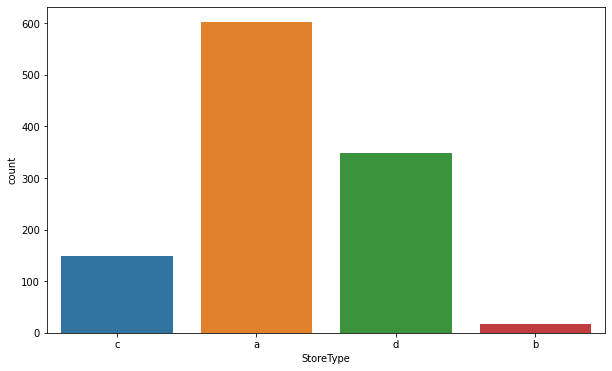

In [230]:
plt.figure(figsize=[10,6])
sns.countplot(x= "StoreType", data=store)
plt.show()


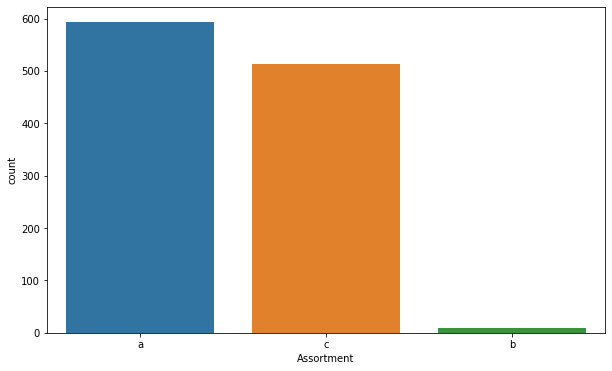

In [231]:
plt.figure(figsize=[10,6])
sns.countplot(x= "Assortment", data=store)
plt.show()

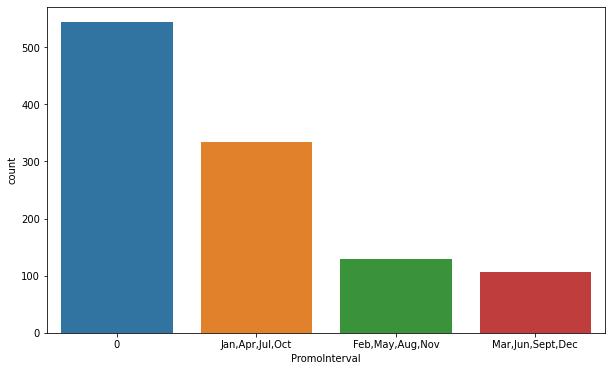

In [119]:
plt.figure(figsize=[10,6])
sns.countplot(x= "PromoInterval", data=store)
plt.show()

###  Inferences on store data
#### 1) Storetype is mostly A  
#### 2) Majority of assortment is type A   
#### 3) Promotion Interval is mainly in January, April, July, October.  

### Univariate Analysis on Numerical Data  (Store Data)

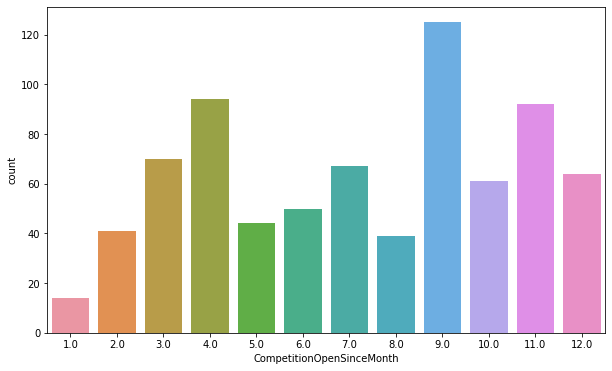

In [120]:
plt.figure(figsize=[10,6])
sns.countplot(x= "CompetitionOpenSinceMonth", data=store)
plt.show()

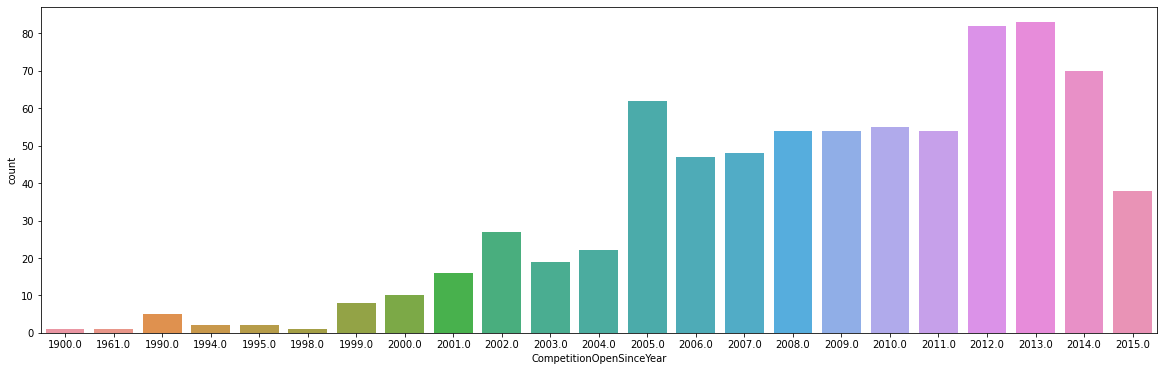

In [121]:
plt.figure(figsize=[20,6])
sns.countplot(x= "CompetitionOpenSinceYear", data=store)
plt.show()

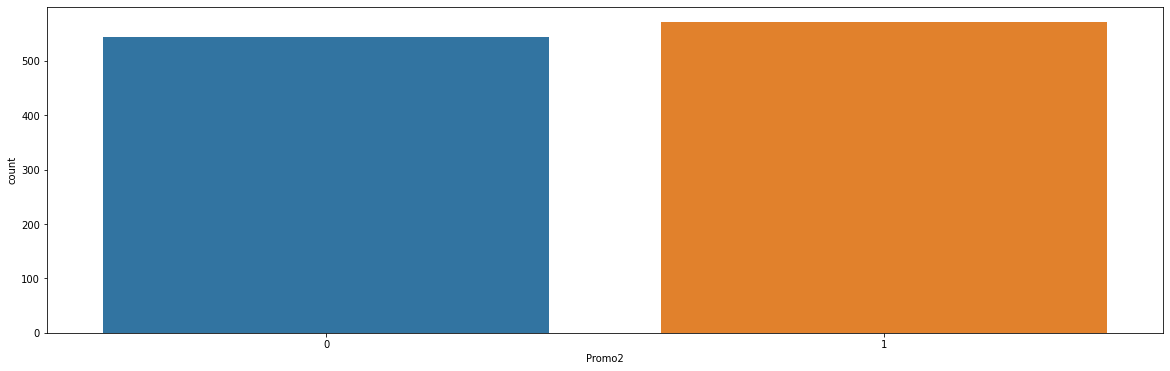

In [122]:
plt.figure(figsize=[20,6])
sns.countplot(x= "Promo2", data=store)
plt.show()

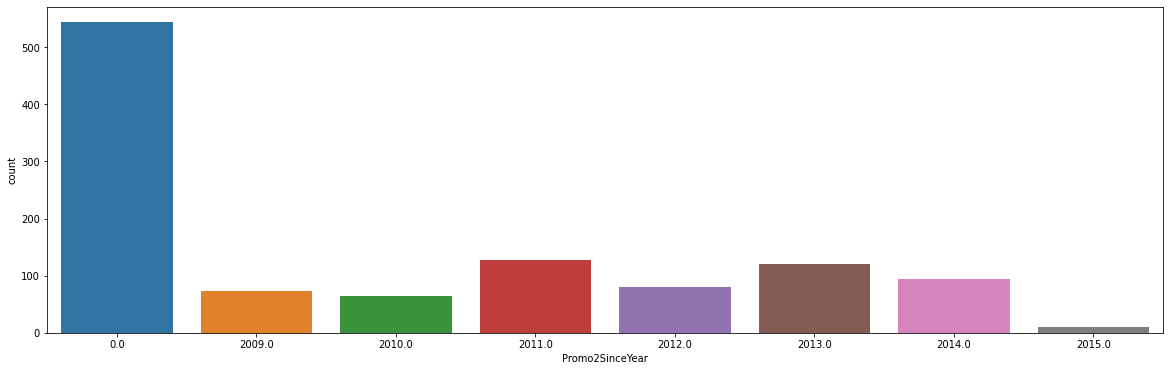

In [123]:

plt.figure(figsize=[20,6])
sns.countplot(x= "Promo2SinceYear", data=store)
plt.show()

### Checking train datatype of the columns and null analysis

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


###### We can see that there are no null values in train data

### lets check numerical distribution

In [125]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,12.083408,1030.239462
std,322.01708,7663.174720,3.212348,6.195983,0.500078,15.542241,1006.038782
min,1.00000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,0.000000,0.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,1.000000,2009.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [126]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Univariate Analysis on Categorical Data  (Train Data)

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


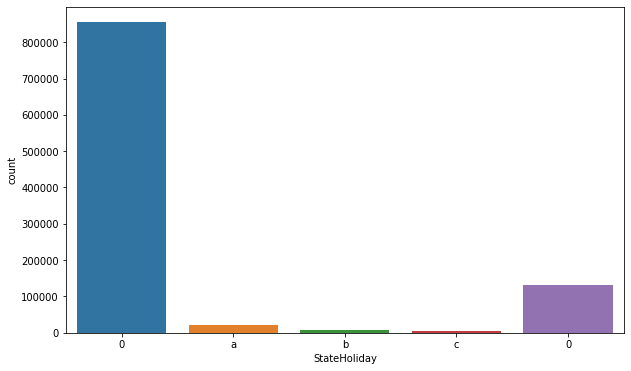

In [232]:
plt.figure(figsize=[10,6])
sns.countplot(x= "StateHoliday", data=train)
plt.show()

### Univariate Analysis on Numerical Data  (train Data)

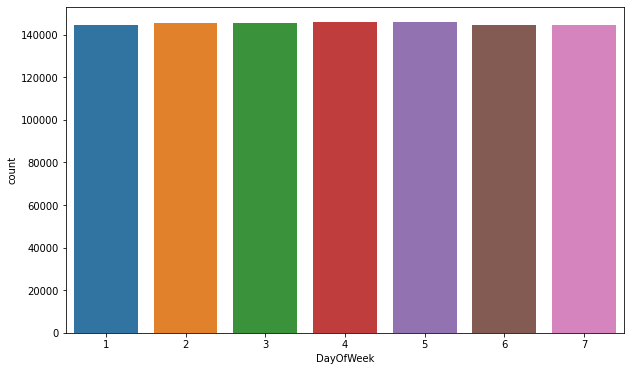

In [240]:
plt.figure(figsize=[10,6])
sns.countplot(x= "DayOfWeek", data=train)
plt.show()

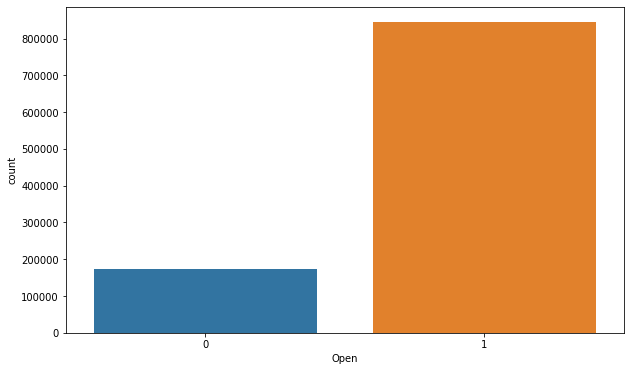

In [241]:
plt.figure(figsize=[10,6])
sns.countplot(x= "Open", data=train)
plt.show()

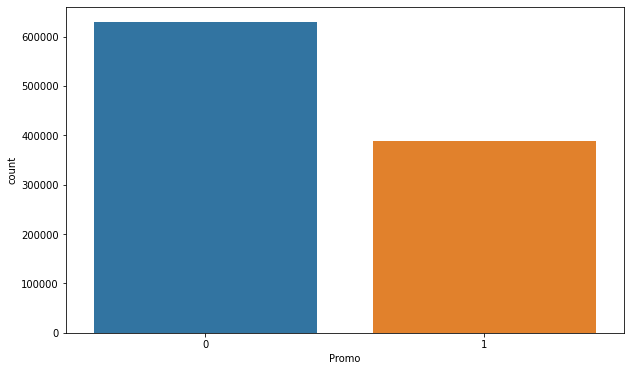

In [242]:
plt.figure(figsize=[10,6])
sns.countplot(x= "Promo", data=train)
plt.show()

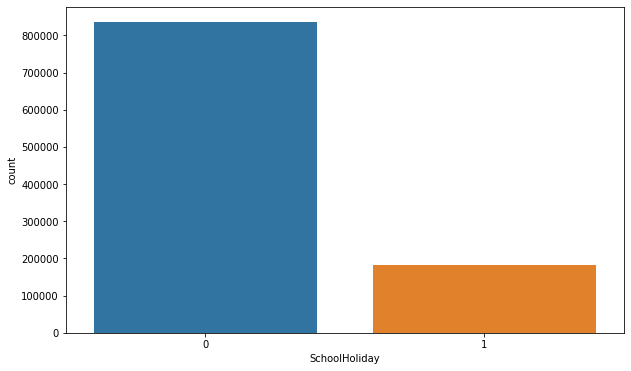

In [243]:
plt.figure(figsize=[10,6])
sns.countplot(x= "SchoolHoliday", data=train)
plt.show()

#Inferences on Train Data


### Analysis on Outlier ( Store Data)

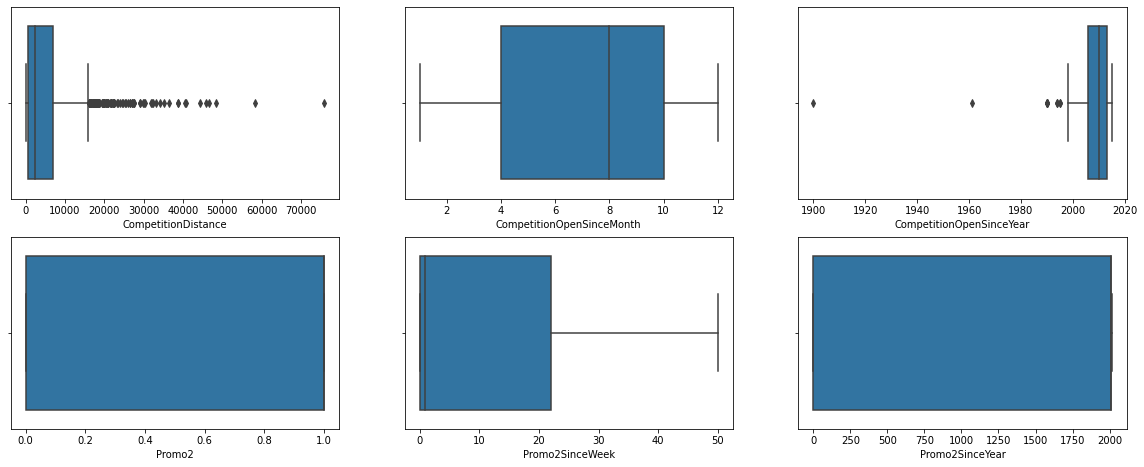

In [133]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'CompetitionDistance', data = store)
plt.subplot(3,3,2)
sns.boxplot(x = 'CompetitionOpenSinceMonth', data = store)
plt.subplot(3,3,3)
sns.boxplot(x = 'CompetitionOpenSinceYear',data = store)
plt.subplot(3,3,4)
sns.boxplot(x = 'Promo2', data = store)
plt.subplot(3,3,5)
sns.boxplot(x = 'Promo2SinceWeek', data = store)
plt.subplot(3,3,6)
sns.boxplot(x = 'Promo2SinceYear', data = store)
plt.show()

#### We can see from the box plot that CompetitionDistance can be capped around 99 percent quantile

In [134]:

store.loc[store.CompetitionDistance>store.CompetitionDistance.quantile(.99), "CompetitionDistance"]=store.CompetitionDistance.quantile(.99)


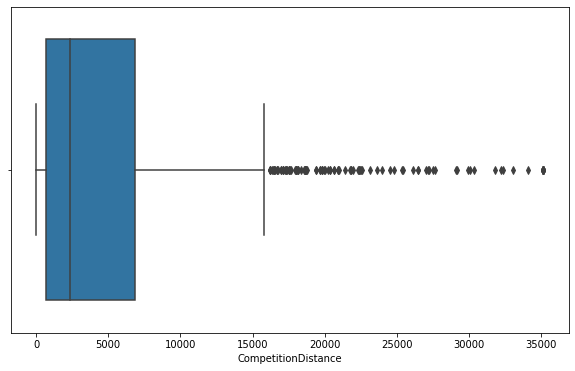

In [244]:
plt.figure(figsize=[10,6])
sns.boxplot(x = 'CompetitionDistance', data = store)
plt.show()


In [136]:
# checking null values of CompetitionDistance

store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [137]:
# Checking the value of CompetitionDistance w.r.t CompetitionOpenSinceMonth and CompetitionOpenSinceYear
store.loc[store.CompetitionDistance.isnull(),['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Store']]


,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Store
290,NaN,NaN,NaN,291
621,NaN,NaN,NaN,622
878,NaN,NaN,NaN,879


#### We can impute value of CompetitionDistance as 0 since there is no value if we compared with CompetitionOpenSinceMonth and CompetitionOpenSinceYear.

In [138]:
# Imputing Zero value for CompetitionDistance

store.loc[store.CompetitionDistance.isnull(),'CompetitionOpenSinceMonth']=0
store.loc[store.CompetitionDistance.isnull(),'CompetitionOpenSinceYear']=0
store.loc[store.CompetitionDistance.isnull(),'CompetitionDistance']=0

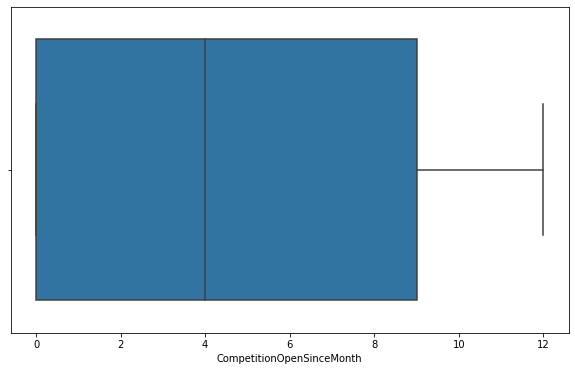

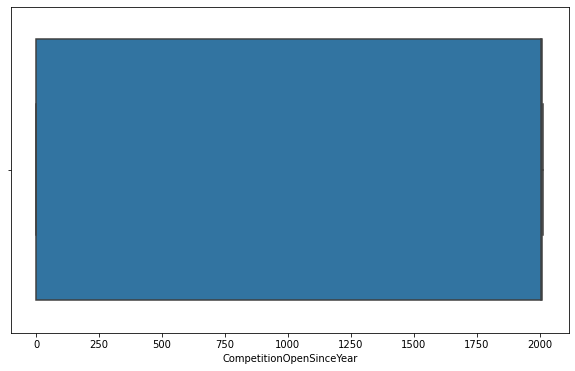

In [246]:
# Plotting box plot for CompetitionOpenSinceMonth and CompetitionOpenSinceYear.
plt.figure(figsize=[10,6])

sns.boxplot(x = 'CompetitionOpenSinceMonth', data = store)
plt.show()
plt.figure(figsize=[10,6])
sns.boxplot(x = 'CompetitionOpenSinceYear', data = store)
plt.show()


In [140]:
# Checking the value of CompetitionDistance w.r.t CompetitionOpenSinceMonth and CompetitionOpenSinceYear
store.loc[store.CompetitionOpenSinceMonth.isnull(),['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Store']]


,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Store
11,NaN,NaN,12
12,NaN,NaN,13
15,NaN,NaN,16
18,NaN,NaN,19
21,NaN,NaN,22
...,...,...,...
1095,NaN,NaN,1096
1099,NaN,NaN,1100
1112,NaN,NaN,1113
1113,NaN,NaN,1114


#### As from box plot and from above analysis we can see that 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear' there is null value present  and no record found so here we can impute with Zero value

In [141]:
# Imputing Zero value for 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear' 

store.CompetitionOpenSinceYear.fillna(0,inplace=True)
store.CompetitionOpenSinceMonth.fillna(0,inplace=True)

In [142]:
#checking null value for store data

((store.isnull().sum()/store.shape[0])*100)

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

In [143]:
# Merging both Store and train dataset

train = train.merge(right=store, on='Store', how='inner')
 

In [144]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

#### There is no nulll value ater merging the dataset.

In [146]:
# Checking the shape

train.shape

(1017209, 18)

In [147]:
# Checking numerical attributes for train dataset
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.297637e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.058439e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.320000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.514470e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


## Bivariate Analysis

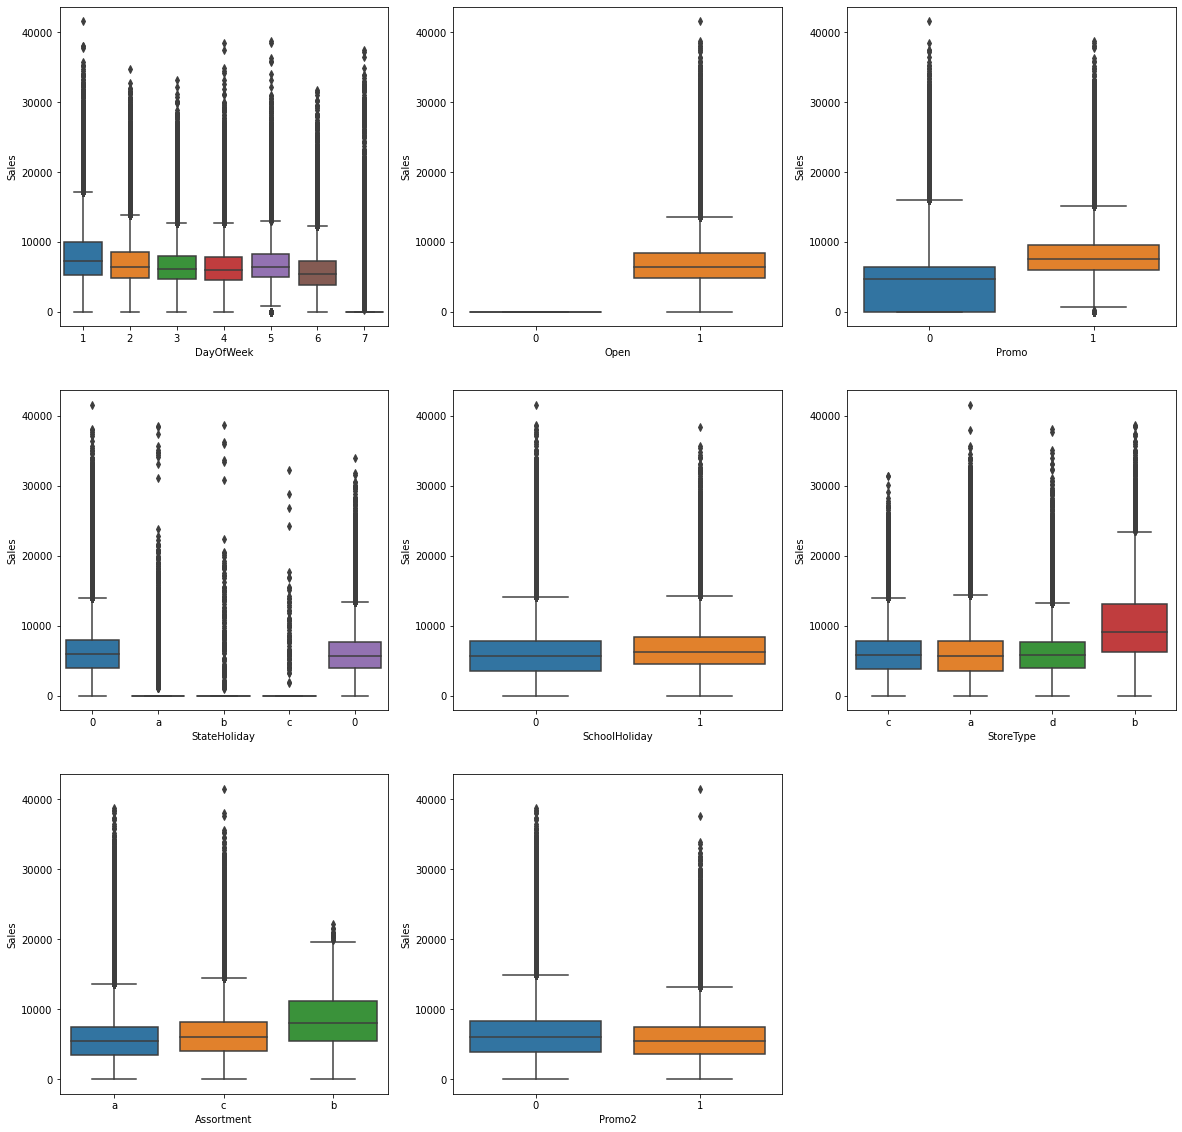

In [148]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'DayOfWeek', y = 'Sales', data = train)
plt.subplot(3,3,2)
sns.boxplot(x = 'Open', y = 'Sales', data = train)
plt.subplot(3,3,3)
sns.boxplot(x = 'Promo', y = 'Sales', data = train)
plt.subplot(3,3,4)
sns.boxplot(x = 'StateHoliday', y = 'Sales', data = train)
plt.subplot(3,3,5)
sns.boxplot(x = 'SchoolHoliday', y = 'Sales', data = train)
plt.subplot(3,3,6)
sns.boxplot(x = 'StoreType', y = 'Sales', data = train)
plt.subplot(3,3,7)
sns.boxplot(x = 'Assortment', y = 'Sales', data = train)
plt.subplot(3,3,8)
sns.boxplot(x = 'Promo2', y = 'Sales', data = train)
plt.show()

### Inferences on above graph

1) Day of week 1, 2 and 5 are having high sales.    
2) When the store was open the sales is high which is indicative.    
3) Store having promotion campaign the sales is high.   
4) Sales is low on state holiday a,b and c.   
5) Sales was affected  due to school holiday.   
6) StoreType B is having maximum sales.  
7) Assortment level B is having maximum Sale.    
8) Store not participating in promotions is having maximum sales.    

In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [150]:
## Splitting Numerical data into train_numerical
train_numerical = train.select_dtypes(include='number')
train_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   CompetitionDistance        1017209 non-null  float64
 8   CompetitionOpenSinceMonth  1017209 non-null  float64
 9   CompetitionOpenSinceYear   1017209 non-null  float64
 10  Promo2                     1017209 non-null  int64  
 11  Promo2SinceWeek            1017209 non-null  float64
 12  Promo2SinceYear            1017209 non-null  float64
dtypes: float64(5

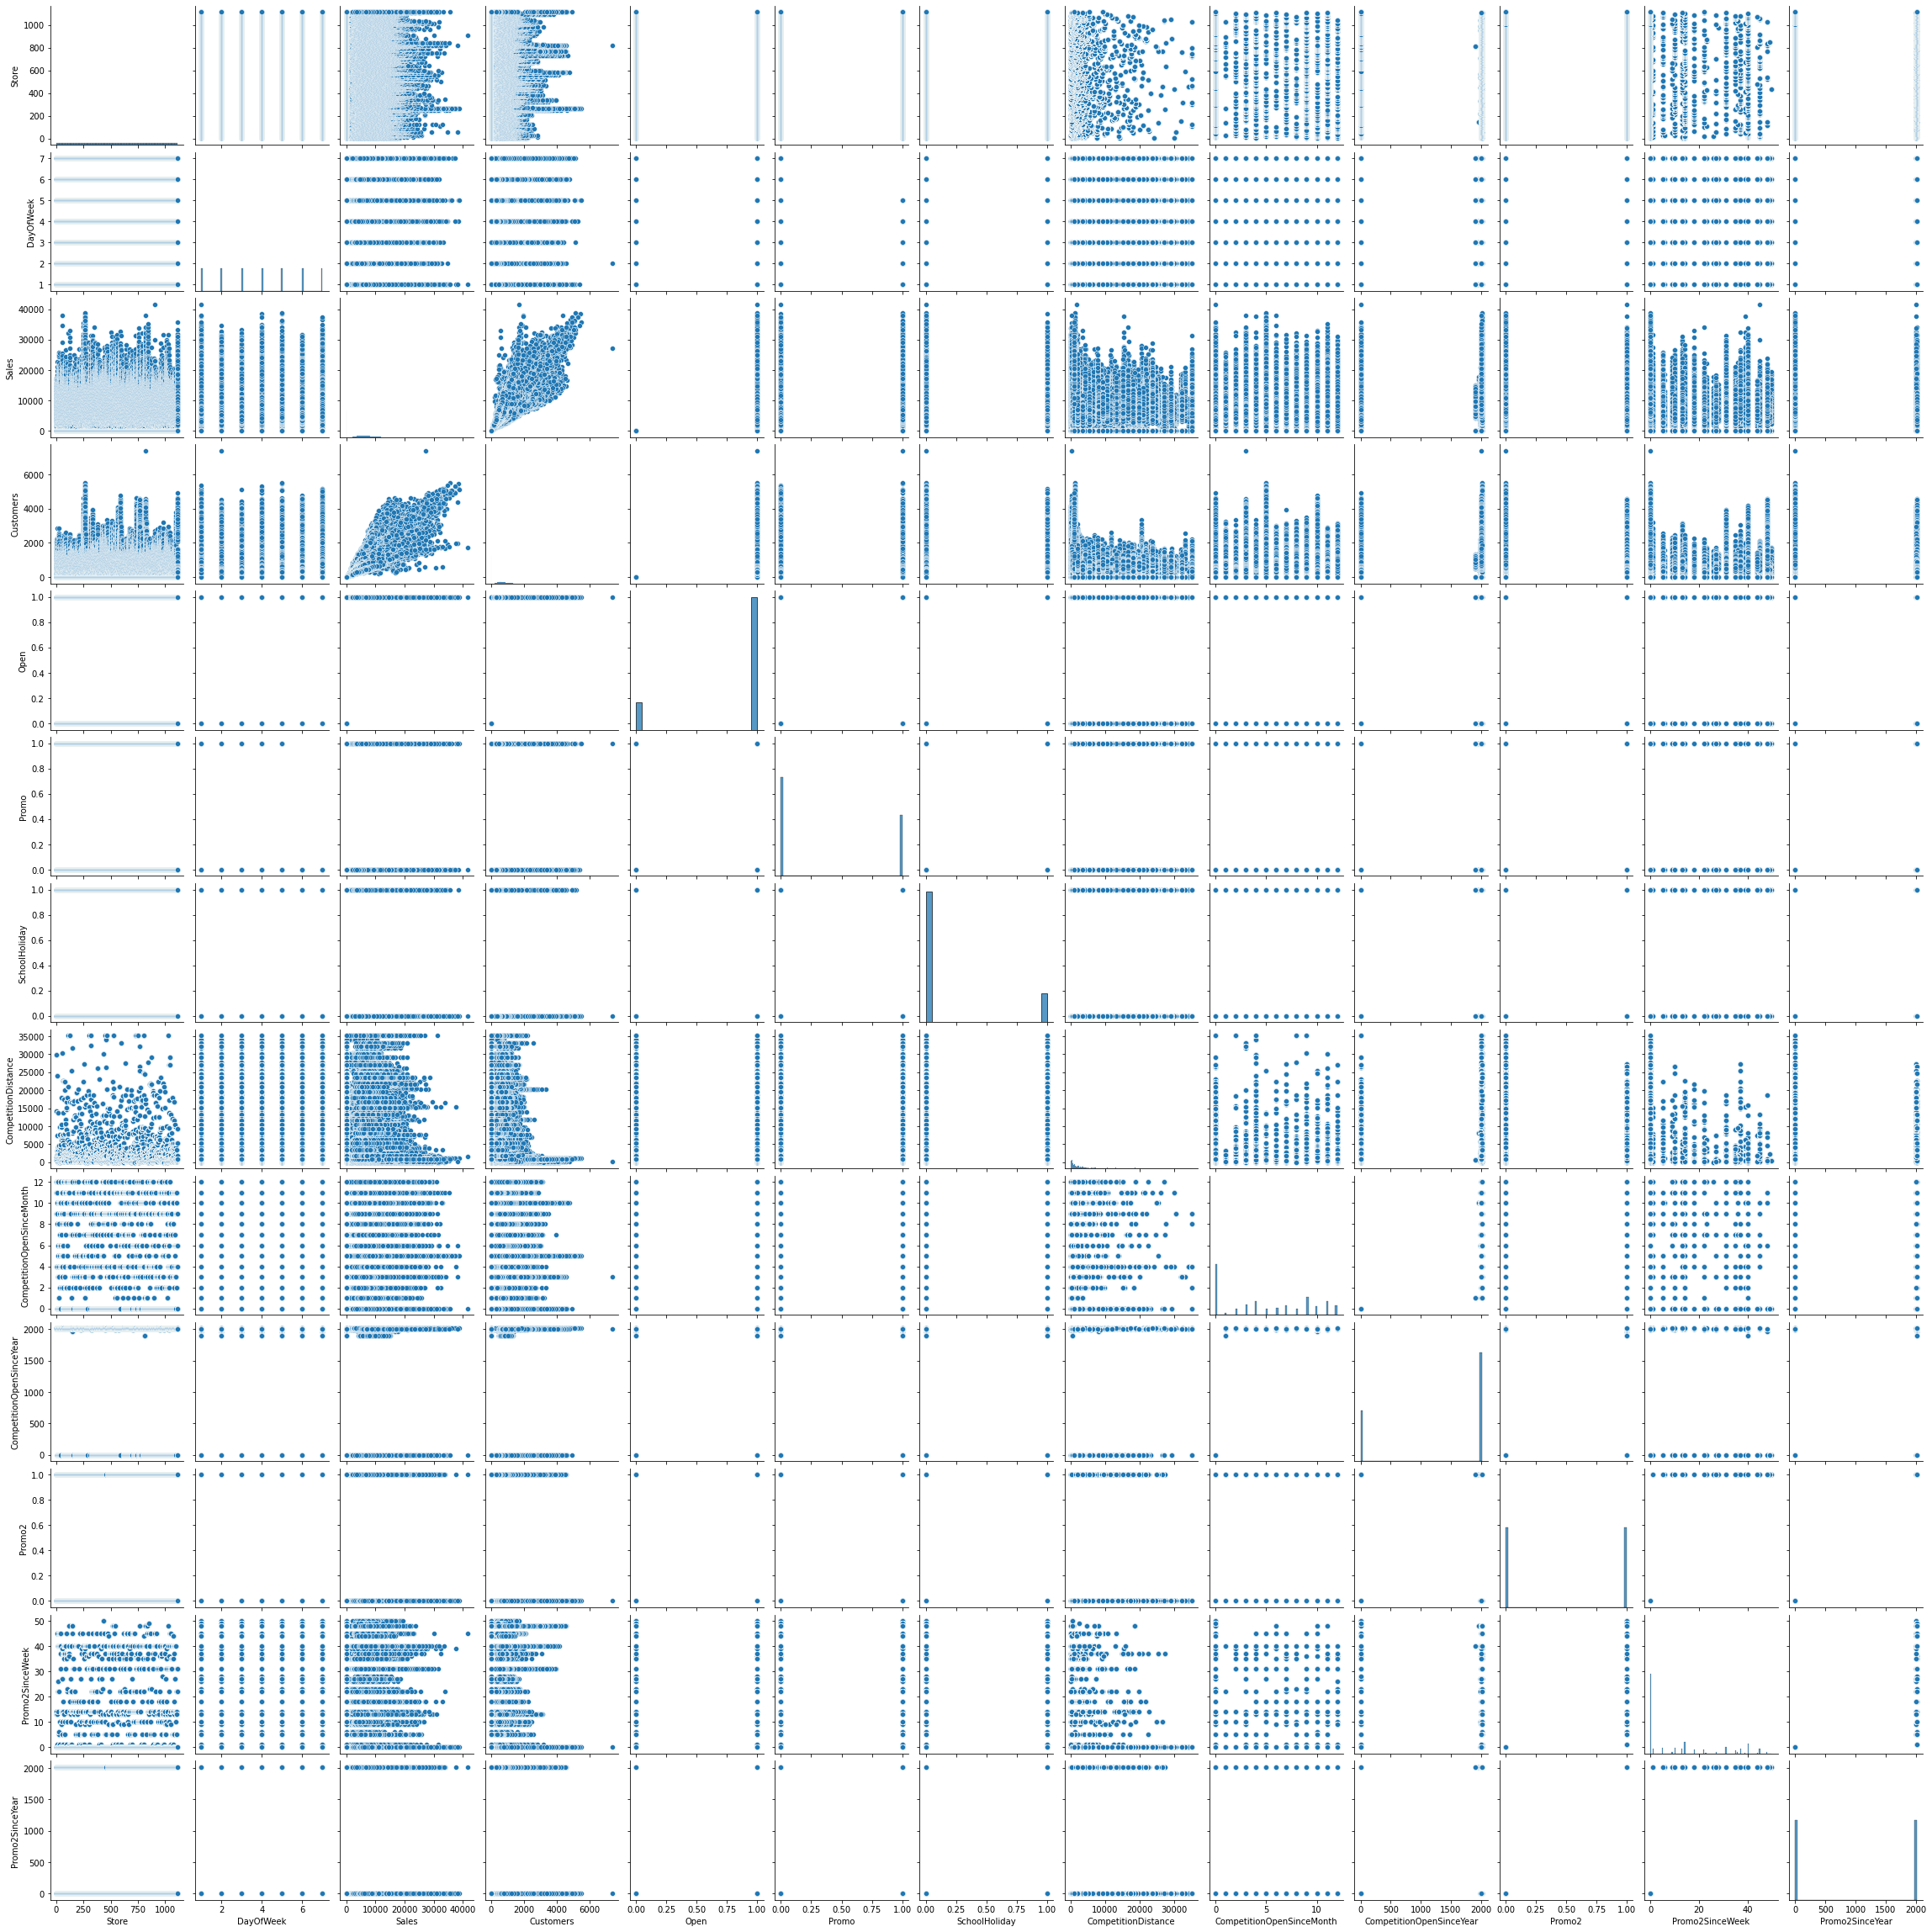

In [46]:
## Checking linear relationship between independent varaiables
sns.pairplot(train_numerical)
plt.show()

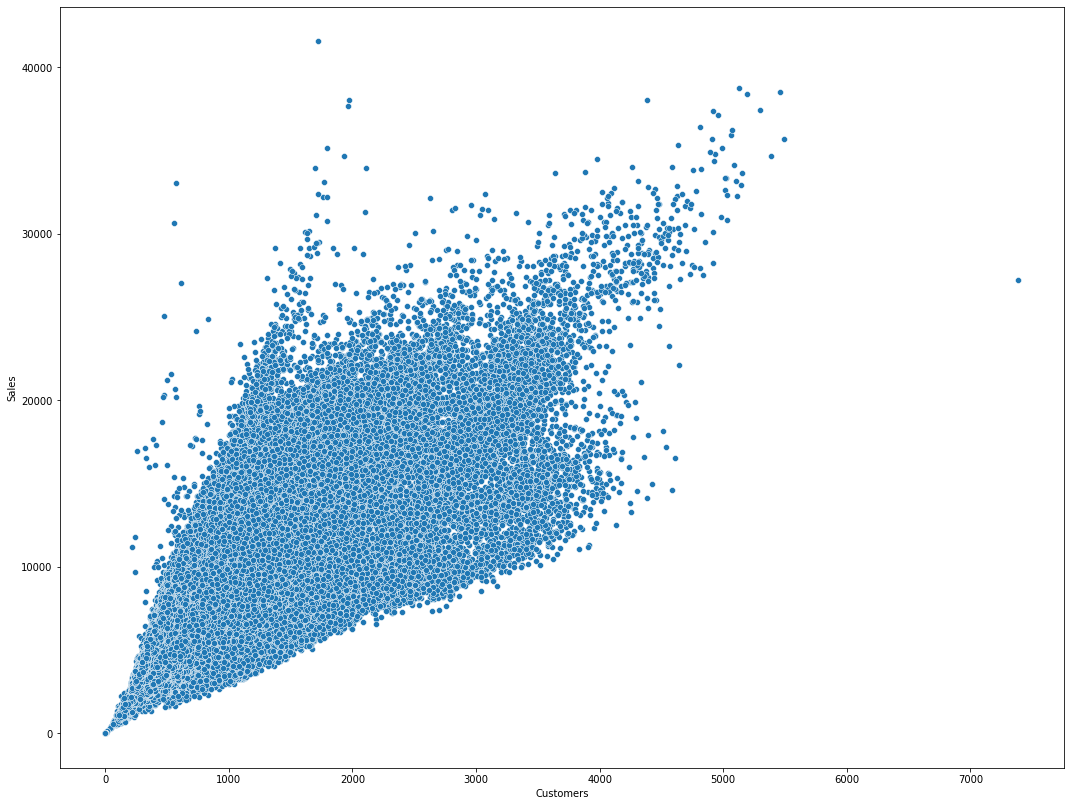

In [151]:
# Scatter Plot on Customer and Sales

sns.scatterplot(x = 'Customers', y = 'Sales', data = train)
plt.show()


### No of customer increaes then sales is also increasing

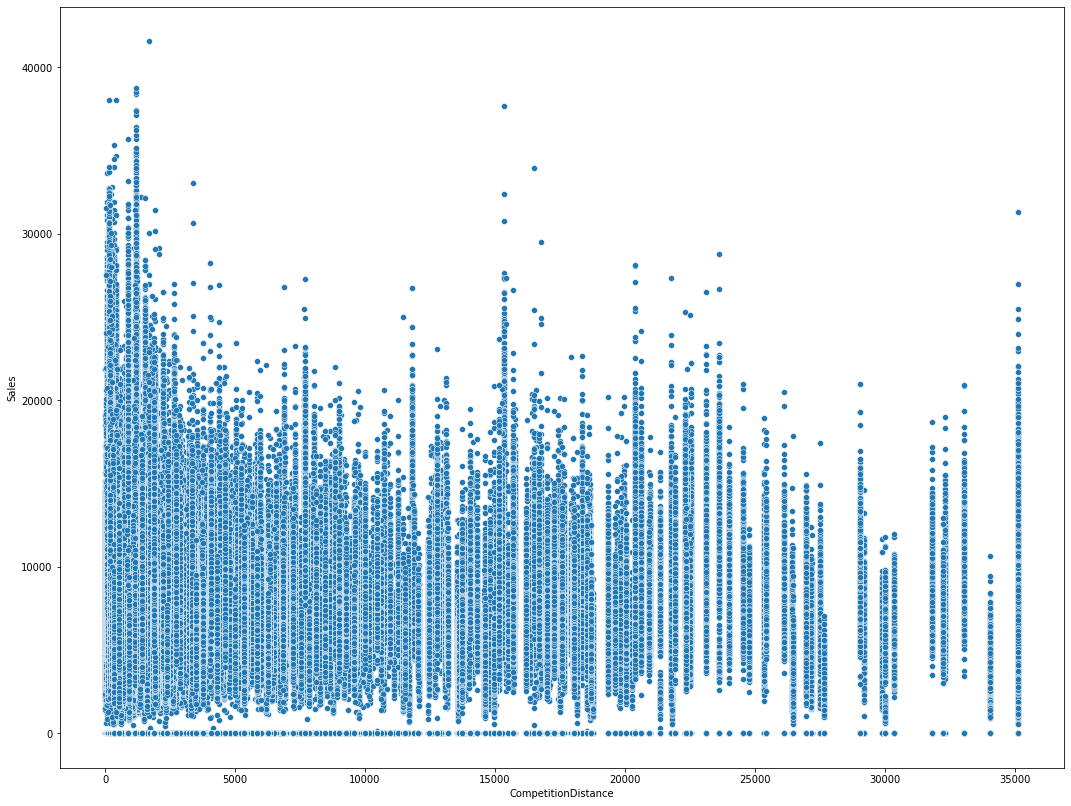

In [152]:
# Scatter Plot on CompetitionDistance and Sales

sns.scatterplot(x = 'CompetitionDistance', y = 'Sales', data = train)
plt.show()


### Less sales are happening for competitionDistance above 2.5k

### Multivariate Analysis

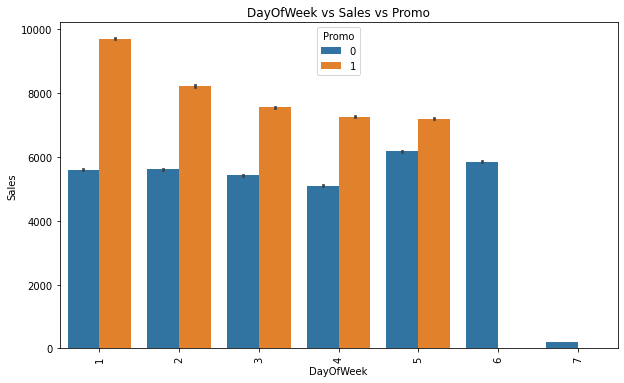

In [153]:
# Checking co-relation between Sales vs Days vs Promo

plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek',y='Sales',hue='Promo',data=train)
plt.title("DayOfWeek vs Sales vs Promo")
plt.xticks(rotation = 90)
plt.show()

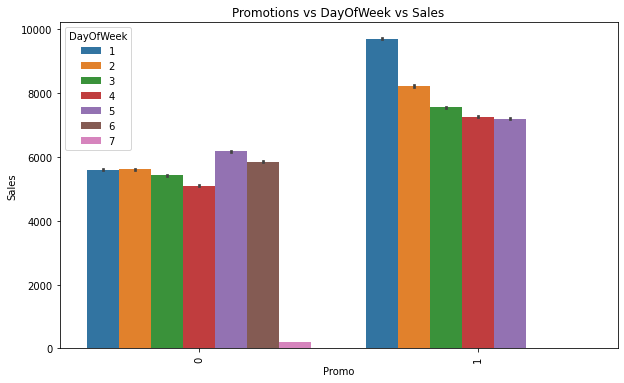

In [154]:
# Checking a plot between sales vs Promo vs Days

plt.figure(figsize=(10, 6))
sns.barplot(x='Promo',y='Sales',hue='DayOfWeek',data=train)
plt.title("Promotions vs DayOfWeek vs Sales")
plt.xticks(rotation = 90)
plt.show()

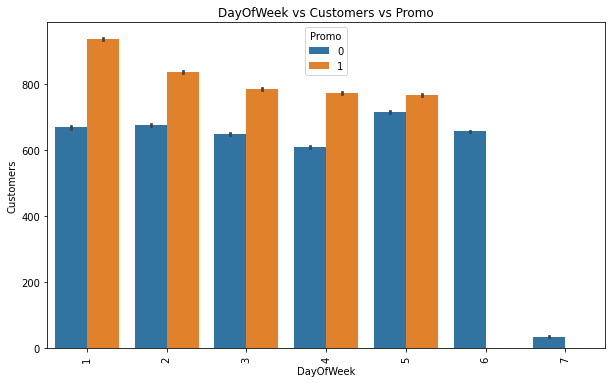

In [155]:
### Checking co-relation between DayOfWeek vs customer vs Promo
 
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek',y='Customers',hue='Promo',data=train)
plt.title("DayOfWeek vs Customers vs Promo")
plt.xticks(rotation = 90)
plt.show()

### Inferences:
No. of customers are more when there is a promotion is happening and it is high at the start of week and keeps on decreasing.

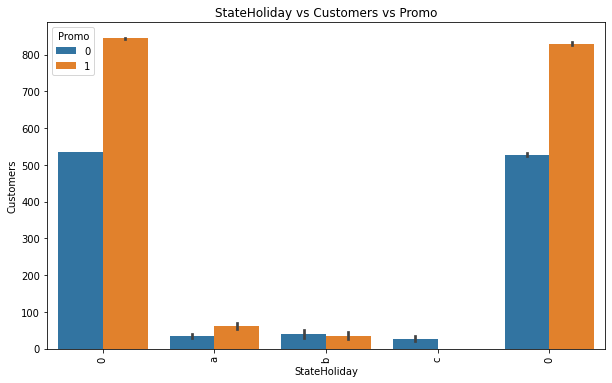

In [156]:
### Checking co-relation between StateHoliday vs customer vs Promo
 
plt.figure(figsize=(10, 6))
sns.barplot(x='StateHoliday',y='Customers',hue='Promo',data=train)
plt.title("StateHoliday vs Customers vs Promo")
plt.xticks(rotation = 90)
plt.show()

### Inferences;
For Stateholiday A,B and C there are less number of customers.

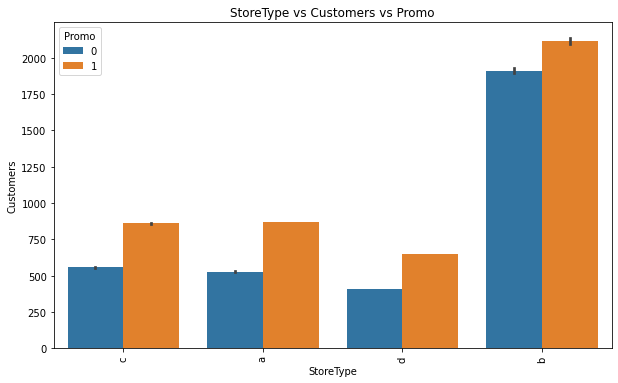

In [157]:
### Checking co-relation between StoreType vs customer vs Promo
 
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType',y='Customers',hue='Promo',data=train)
plt.title("StoreType vs Customers vs Promo")
plt.xticks(rotation = 90)
plt.show()

### Inferences:
Customer are high for StoreType B as compared to other StoreType for both condition whether there is promotion or no promotion.

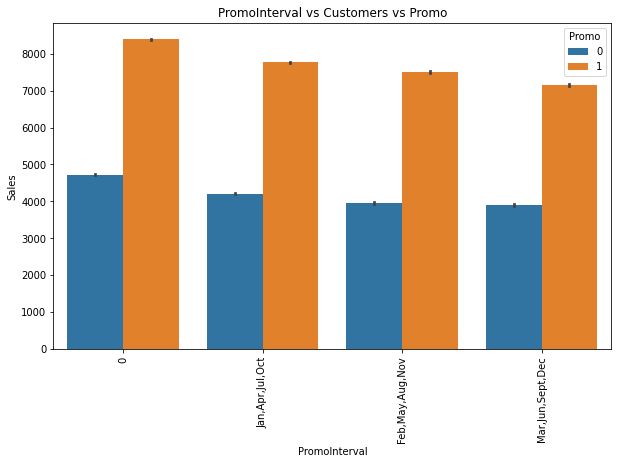

In [158]:
### Checking co-relation between PromoInterval vs Sales vs Promo
 
plt.figure(figsize=(10, 6))
sns.barplot(x='PromoInterval',y='Sales',hue='Promo',data=train)
plt.title("PromoInterval vs Customers vs Promo")
plt.xticks(rotation = 90)
plt.show()

### Inferences:  
For PromotionInterval for Jan,Apr,Jul,OCt are having high sales and it slightly decreases for next promotion interval. We can see that are strong correlation of promotion interval and Sales.

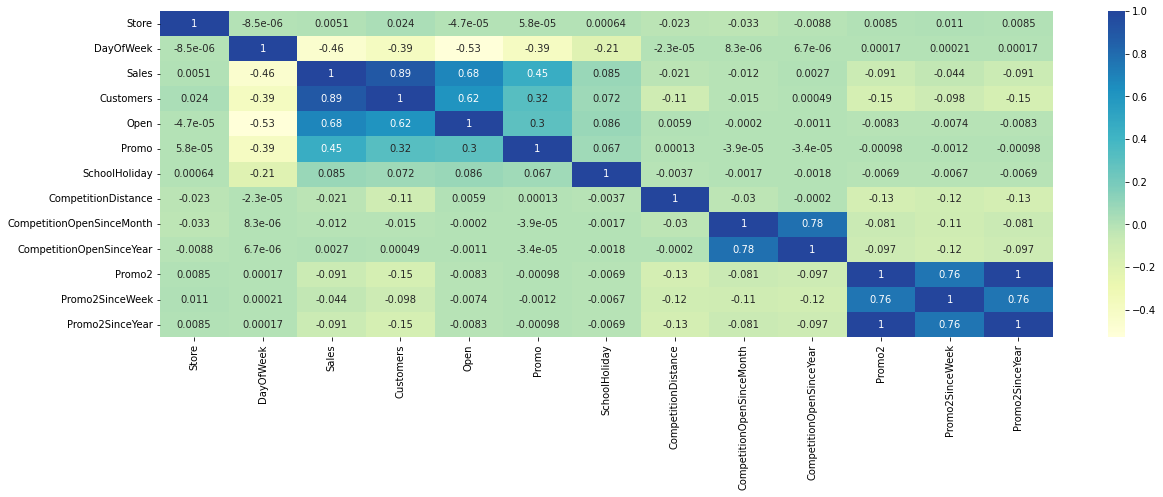

In [159]:
# Checking co-relation coefficients for numercial variables

# plot heat map for corr
cor = train_numerical.corr()
plt.figure(figsize = (20, 6))
sns.heatmap(cor, annot = True,center=0.4,cmap="YlGnBu")
plt.show()

### Inferences:
 1) Strong Correlation  exits between Sales and Customer of 0.89.  
 2) There is some amount of correlation exits between CompetitionOpenSinceYear and CompetitionOpenSinceYear of 0.78 similarly for Promo2SinceWeek and Promo of 0.76. Other Variable oes not have significant Correlation between each other.
 
 

### Creating a Dummy Variabe

In [160]:
# Create a dummy variable for StoreType

dummies=pd.get_dummies(train['StoreType'],drop_first=True,prefix='StoreType')
train=pd.concat([train,dummies],axis=1)

In [161]:
# Create a dummy variable for DayOfWeek

dummies=pd.get_dummies(train['DayOfWeek'],drop_first=True,prefix='DayOfWeek')
train=pd.concat([train,dummies],axis=1)

In [162]:
# Create a dummy variable for Assortment

dummies=pd.get_dummies(train['Assortment'],drop_first=True,prefix='Assortment')
train=pd.concat([train,dummies],axis=1)

In [163]:
train.shape

(1017209, 29)

In [164]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,StoreType_c,StoreType_d,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1,0,0,0,0,1,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1,0,0,0,1,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1,0,0,1,0,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1,0,1,0,0,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1,0,0,0,0,0,0,0,0,0


In [165]:
## Removing Assortment, DayofWeek and StoreType columns
train.drop(['DayOfWeek','StoreType','Assortment'],axis=1,inplace=True)
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_c,StoreType_d,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Assortment_b,Assortment_c
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,1,0,0,0,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,1,0,0,0,1,0,0,0,0,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,1,0,0,1,0,0,0,0,0,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,1,0,1,0,0,0,0,0,0,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,0,0,0,0,0


In [166]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   CompetitionDistance        1017209 non-null  float64
 9   CompetitionOpenSinceMonth  1017209 non-null  float64
 10  CompetitionOpenSinceYear   1017209 non-null  float64
 11  Promo2                     1017209 non-null  int64  
 12  Promo2SinceWeek            1017209 non-null  float64
 13  Promo2SinceY

In [167]:
# Combining CompetitionOpenSinceMonth and CompetitionOpenSinceYear

train['CompetitionOpenSince'] = train.CompetitionOpenSinceYear.astype(int).astype(str) + '-' + train.CompetitionOpenSinceMonth.astype(int).astype(str) + '-01'
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_d,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Assortment_b,Assortment_c,CompetitionOpenSince
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,0,0,0,1,0,0,0,0,2008-9-01
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,0,0,0,1,0,0,0,0,0,2008-9-01
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,0,0,1,0,0,0,0,0,0,2008-9-01
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,0,0,0,0,2008-9-01
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,0,0,0,2008-9-01


In [168]:
## Dropping the column CompetitionOpenSinceMonth and CompetitionOpenSinceYear

train.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis=1,inplace=True)
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,StoreType_d,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Assortment_b,Assortment_c,CompetitionOpenSince
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,0,2008-9-01
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,0,...,0,0,0,1,0,0,0,0,0,2008-9-01
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,0,...,0,0,1,0,0,0,0,0,0,2008-9-01
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,0,...,0,1,0,0,0,0,0,0,0,2008-9-01
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,0,...,0,0,0,0,0,0,0,0,0,2008-9-01


In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Store                 1017209 non-null  int64  
 1   Date                  1017209 non-null  object 
 2   Sales                 1017209 non-null  int64  
 3   Customers             1017209 non-null  int64  
 4   Open                  1017209 non-null  int64  
 5   Promo                 1017209 non-null  int64  
 6   StateHoliday          1017209 non-null  object 
 7   SchoolHoliday         1017209 non-null  int64  
 8   CompetitionDistance   1017209 non-null  float64
 9   Promo2                1017209 non-null  int64  
 10  Promo2SinceWeek       1017209 non-null  float64
 11  Promo2SinceYear       1017209 non-null  float64
 12  PromoInterval         1017209 non-null  object 
 13  StoreType_b           1017209 non-null  uint8  
 14  StoreType_c           1017209 non-

In [170]:
train.isnull().sum()

Store                   0
Date                    0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
CompetitionDistance     0
Promo2                  0
Promo2SinceWeek         0
Promo2SinceYear         0
PromoInterval           0
StoreType_b             0
StoreType_c             0
StoreType_d             0
DayOfWeek_2             0
DayOfWeek_3             0
DayOfWeek_4             0
DayOfWeek_5             0
DayOfWeek_6             0
DayOfWeek_7             0
Assortment_b            0
Assortment_c            0
CompetitionOpenSince    0
dtype: int64

In [171]:
#Converting date field to datetime object

train['Date']=pd.to_datetime(train['Date'],errors='coerce')

In [172]:
train['CompetitionOpenSince']=pd.to_datetime(train['CompetitionOpenSince'],errors='coerce')

In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   Date                  1017209 non-null  datetime64[ns]
 2   Sales                 1017209 non-null  int64         
 3   Customers             1017209 non-null  int64         
 4   Open                  1017209 non-null  int64         
 5   Promo                 1017209 non-null  int64         
 6   StateHoliday          1017209 non-null  object        
 7   SchoolHoliday         1017209 non-null  int64         
 8   CompetitionDistance   1017209 non-null  float64       
 9   Promo2                1017209 non-null  int64         
 10  Promo2SinceWeek       1017209 non-null  float64       
 11  Promo2SinceYear       1017209 non-null  float64       
 12  PromoInterval         1017209 non-null  ob

In [174]:
## Deleting 'Promo2','Promo2SinceWeek','Promo2SinceYear','Promo2SinceYear' from column


train.drop(['Promo2','Promo2SinceWeek','Promo2SinceYear','Promo2SinceYear'],inplace=True,axis=1)
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,PromoInterval,...,StoreType_d,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Assortment_b,Assortment_c,CompetitionOpenSince
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,0,2008-09-01
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,0,...,0,0,0,1,0,0,0,0,0,2008-09-01
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,0,...,0,0,1,0,0,0,0,0,0,2008-09-01
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,0,...,0,1,0,0,0,0,0,0,0,2008-09-01
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,0,...,0,0,0,0,0,0,0,0,0,2008-09-01


In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   Date                  1017209 non-null  datetime64[ns]
 2   Sales                 1017209 non-null  int64         
 3   Customers             1017209 non-null  int64         
 4   Open                  1017209 non-null  int64         
 5   Promo                 1017209 non-null  int64         
 6   StateHoliday          1017209 non-null  object        
 7   SchoolHoliday         1017209 non-null  int64         
 8   CompetitionDistance   1017209 non-null  float64       
 9   PromoInterval         1017209 non-null  object        
 10  StoreType_b           1017209 non-null  uint8         
 11  StoreType_c           1017209 non-null  uint8         
 12  StoreType_d           1017209 non-null  ui

### Time Series Analysis

In [176]:
#Setting date as index

train_new=train.set_index('Date')
train_new.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,PromoInterval,StoreType_b,...,StoreType_d,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Assortment_b,Assortment_c,CompetitionOpenSince
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5263,555,1,1,0,1,1270.0,0,0,...,0,0,0,0,1,0,0,0,0,2008-09-01
2015-07-30,1,5020,546,1,1,0,1,1270.0,0,0,...,0,0,0,1,0,0,0,0,0,2008-09-01
2015-07-29,1,4782,523,1,1,0,1,1270.0,0,0,...,0,0,1,0,0,0,0,0,0,2008-09-01
2015-07-28,1,5011,560,1,1,0,1,1270.0,0,0,...,0,1,0,0,0,0,0,0,0,2008-09-01
2015-07-27,1,6102,612,1,1,0,1,1270.0,0,0,...,0,0,0,0,0,0,0,0,0,2008-09-01


### Plotting Time_Series

In [177]:
def timeseries_plot(series,c):
    fig = plt.figure(figsize=(20, 3))
    series.plot()
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.title('For {}'.format(c))
    plt.show()

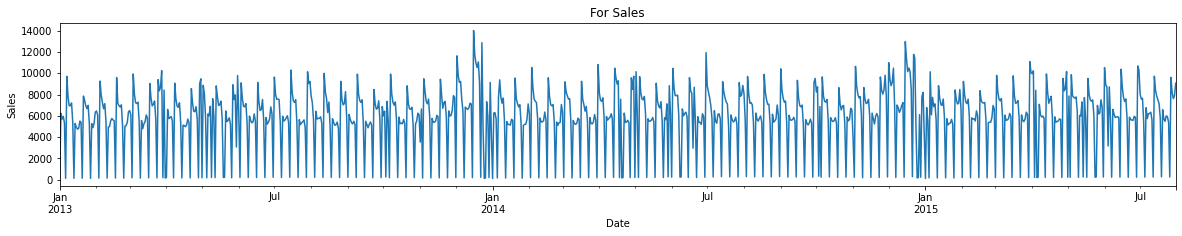

In [180]:
timeseries_plot(train_df_all['Sales'],'Sales')

In [181]:
# Grouping the data

train_df_all=train_new.groupby('Date').agg({'Sales': 'mean',
                                           'Customers':'mean', 
                                           'Promo': 'sum',
                                           'SchoolHoliday':'sum',
                                           'DayOfWeek_2':'mean',
                                           'DayOfWeek_3':'mean',
                                           'DayOfWeek_4':'mean',
                                           'DayOfWeek_5':'mean',
                                           'DayOfWeek_6':'mean',
                                           'DayOfWeek_7':'mean'})
train_df_all.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2013-01-01,87.284560,17.496409,0,1114,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,6233.030493,748.049327,0,1115,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-03,5693.112108,682.547085,0,1040,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-04,5954.218834,701.468161,0,1040,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-05,5337.751570,616.566816,0,112,0.0,0.0,0.0,0.0,1.0,0.0


### Seasonal Decomposition

In [186]:
def plot_seasonal_decomposition(series,c,model):
    rcParams['figure.figsize'] = 18, 14
    decom = sm.tsa.seasonal_decompose(series, model=model) # additive seasonal index
    fig = decom.plot()
    plt.show()

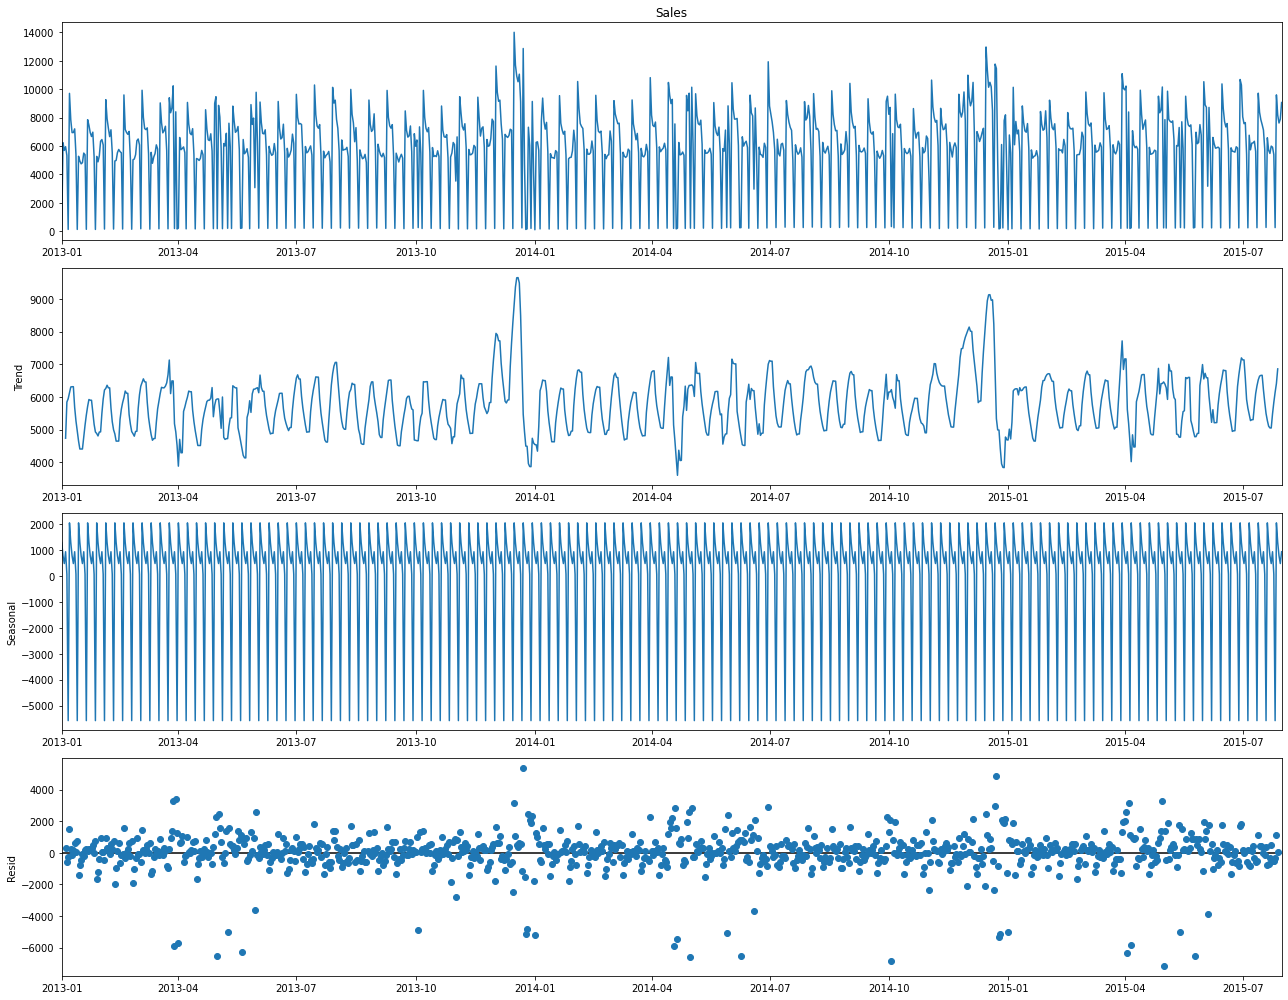

In [187]:
plot_seasonal_decomposition(train_df_all['Sales'],'Sales','additive')

## Stationary Test

In [188]:
from statsmodels.tsa.stattools import adfuller

def stationary_test(df):
    for c in df.columns:
        print('For ',c)
        print('*'*100)
        r=adfuller(df[c],autolag='AIC')
        print('ADF Statistic=',r[0])
        print('P value=',r[1])
        output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
        p_value = output['pvalue']
        if p_value <= 0.05:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")  

In [189]:
stationary_test(train_df_all[['Sales','Customers']])

For  Sales
****************************************************************************************************
ADF Statistic= -5.650822837207901
P value= 9.870006549261777e-07
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
For  Customers
****************************************************************************************************
ADF Statistic= -5.933710149589025
P value= 2.3477735379187485e-07
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


### Inferences:
1) We can see that sales and customer are strongly correlated to each other so when we check the statistically you can see that we can reject the  null hypothesis. hence the series are stationary because P values are less than 0.05.

2) We chosse customer because there is no other variable which is linearly correlated with Sales target variables.

###  Plotting Autocorrelation Function (ACF) Sales

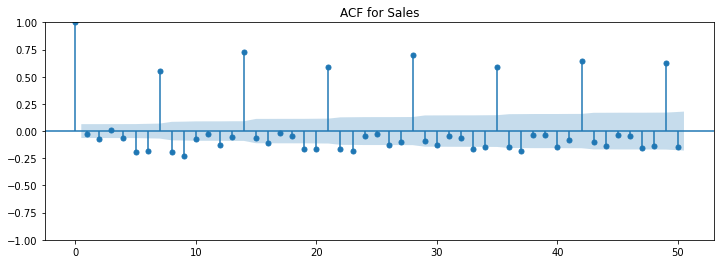

In [191]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(train_df_all['Sales'], ax=plt.gca(), lags = 50)
plt.title('ACF for {}'.format("Sales"))
plt.show()


###  Plotting Partial Autocorrelation Function (PACF) Sales

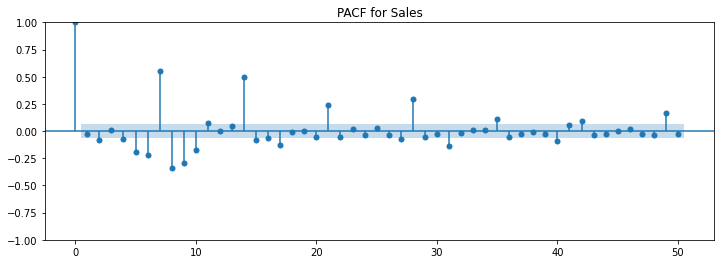

In [192]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(train_df_all['Sales'], ax=plt.gca(), lags = 50)
plt.title('PACF for {}'.format("Sales"))
plt.show()

### Inferences:
### From ACF we can see that q value is 0 afterwhich correlation is coming down where from PACF value we can see that p value is 7.

### Plotting Autocorrelation Function (ACF) Customer

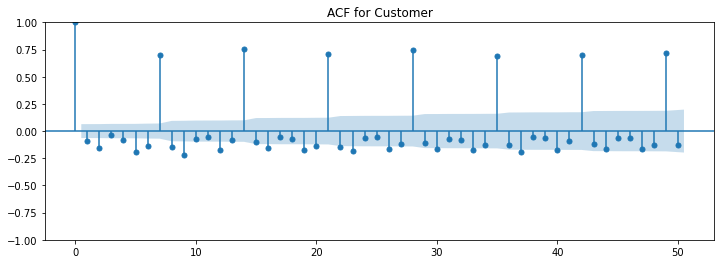

In [193]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(train_df_all['Customers'], ax=plt.gca(), lags = 50)
plt.title('ACF for {}'.format("Customer"))
plt.show()


### Plotting Partial Autocorrelation Function (PACF) Customer

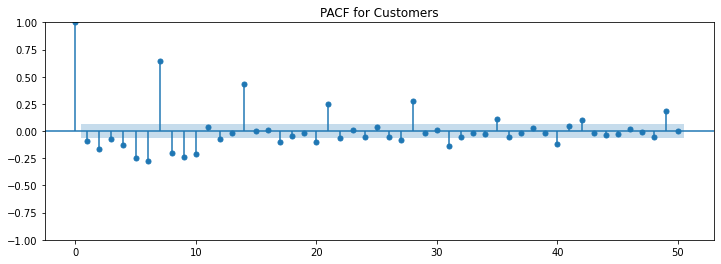

In [194]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(train_df_all['Customers'], ax=plt.gca(), lags = 50)
plt.title('PACF for {}'.format("Customers"))
plt.show()

### Inferences:
### From ACF we can see that q vale is 0 and from PACF q value is 7.

### Splitting of Train and Test Data

In [195]:
## Checking shape of train_df_al

train_df_all.shape

(942, 10)

In [196]:
train_len = 900
X_train= train_df_all[0:train_len] # first 900 days as training set
X_test = train_df_all[train_len:] # last 42 days as test dataset
X_train.shape

(900, 10)

### Standardising Train and Test Data

In [197]:
scaler = MinMaxScaler()

In [198]:
## Apply Scaler to the continous variable
num_vars= ['Sales','Promo',"Customers",'SchoolHoliday']
X_train[num_vars]= scaler.fit_transform(X_train[num_vars])
X_train.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.0,0.999103,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,0.441350,0.543373,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-03,0.402577,0.494654,0.0,0.932735,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-04,0.421328,0.508727,0.0,0.932735,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-05,0.377057,0.445579,0.0,0.100448,0.0,0.0,0.0,0.0,1.0,0.0


In [199]:
X_train.Promo.value_counts()

0.000000    555
1.000000    271
0.838565     74
Name: Promo, dtype: int64

In [200]:
## Applying transform on Test Data
X_test[num_vars]= scaler.transform(X_test[num_vars])
X_test.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2015-06-20,0.405336,0.453472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015-06-21,0.009824,0.015096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015-06-22,0.415762,0.489576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06-23,0.399006,0.475851,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-06-24,0.396755,0.474848,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Vector AutoRegressive Model

In [109]:
#exog = X_train[['Promo',"SchoolHoliday","DayOfWeek_2","DayOfWeek_3", "DayOfWeek_4", "DayOfWeek_5", "DayOfWeek_6", "DayOfWeek_7"]]
#mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,0), trend='n')
#res=var_model.select_order(maxlags=15)
#res = mod.fit(maxiter=100,disp=False)
#print(res.summary())
#Note the AIC value - lower AIC => better model

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:              1017209
Model:                             VAR(1)   Log Likelihood           -16239305.456
Date:                    Wed, 06 Apr 2022   AIC                       32478624.912
Time:                            11:11:27   BIC                       32478707.740
Sample:                                 0   HQIC                      32478647.691
                                - 1017209                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):     193449.90, 102068.78   Jarque-Bera (JB):   315112.47, 10670034.69
Prob(Q):                          0.00, 0.00   Prob(JB):                       0.00, 0.00
Heteroskedasticity (H):           1.06, 1.29   Skew:                          -0.61, 0.89
Prob(H) (two-sided):              0.00, 0.00   Kurtosis:          

### Training on Vector AutoRegressive Model

In [202]:
exog = X_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
end = X_train[['Sales', 'Customers']].astype(float)
model = sm.tsa.VAR(end,exog)
res=model.select_order(maxlags=15)
print(res.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -12.15      -12.05   5.280e-06      -12.11
1       -12.27      -12.15   4.698e-06      -12.22
2       -12.27      -12.12   4.712e-06      -12.21
3       -12.30      -12.14   4.533e-06      -12.24
4       -12.31      -12.12   4.515e-06      -12.24
5       -12.31      -12.10   4.510e-06      -12.23
6       -12.32      -12.09   4.469e-06      -12.23
7       -12.32      -12.07   4.448e-06      -12.23
8       -12.48      -12.20   3.821e-06      -12.37
9       -12.51     -12.21*   3.707e-06      -12.39
10      -12.52      -12.21   3.648e-06      -12.40
11      -12.54      -12.20   3.581e-06      -12.41
12      -12.53      -12.18   3.604e-06      -12.40
13      -12.54      -12.16   3.574e-06      -12.40
14      -12.59      -12.19   3.421e-06     -12.43*
15     -12.59*      -12.17  3.395e-06*      -12.43
-------------------------------

### Inferences:   

### We can see that lag 11 has lowest AIC value, Lower the AIC value better is the model.

In [203]:
# Model Fitting 

model_final = model.fit(11)
model_final.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Apr, 2022
Time:                     20:44:56
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.2106
Nobs:                     889.000    HQIC:                  -12.4169
Log likelihood:           3115.22    FPE:                3.56415e-06
AIC:                     -12.5446    Det(Omega_mle):     3.32801e-06
--------------------------------------------------------------------
Results for equation Sales
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.337940         0.057254            5.902           0.000
Promo                 0.169451         0.016244           10.432           0.000
SchoolHoliday        -0.033177         0.012687           -2

### Cointegration using  Johansen test.

In [204]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

def cointegration_test(df, lag): 
    alpha=0.05
    out = coint_johansen(df,-1,lag)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1   
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

### Checking Datatype of train data

In [205]:
train_df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2013-01-01 to 2015-07-31
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales          942 non-null    float64
 1   Customers      942 non-null    float64
 2   Promo          942 non-null    int64  
 3   SchoolHoliday  942 non-null    int64  
 4   DayOfWeek_2    942 non-null    float64
 5   DayOfWeek_3    942 non-null    float64
 6   DayOfWeek_4    942 non-null    float64
 7   DayOfWeek_5    942 non-null    float64
 8   DayOfWeek_6    942 non-null    float64
 9   DayOfWeek_7    942 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 81.0 KB


In [206]:
train_df_all['Sales']=train_df_all['Sales'].apply(lambda x:round(x))
train_df_all['Customers']=train_df_all['Customers'].apply(lambda x:round(x))

In [207]:
train_df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2013-01-01 to 2015-07-31
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales          942 non-null    int64  
 1   Customers      942 non-null    int64  
 2   Promo          942 non-null    int64  
 3   SchoolHoliday  942 non-null    int64  
 4   DayOfWeek_2    942 non-null    float64
 5   DayOfWeek_3    942 non-null    float64
 6   DayOfWeek_4    942 non-null    float64
 7   DayOfWeek_5    942 non-null    float64
 8   DayOfWeek_6    942 non-null    float64
 9   DayOfWeek_7    942 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 81.0 KB


In [210]:
cointegration_test(train_df_all[['Sales','Customers']],10)
rank=select_coint_rank(train_df_all[['Sales','Customers']],-1,10)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Sales  ::  127.93    > 12.3212   =>   True
Customers ::  6.57      > 4.1296    =>   True


In [211]:
print(rank.rank)

2


### According to above rank we can see that ranks are same which means both the time series are stationary but they are not cointegreated. We can use VAR Model

## Checking Lag order and accordingly forecasting the model

In [212]:
lag_order = model_final.k_ar
print(lag_order) 
forecast_input = X_train[['Sales','Customers']].values[-lag_order:]
forecast_input

11


array([[0.43595062, 0.50832754],
       [0.41397174, 0.4892133 ],
       [0.41579704, 0.49799996],
       [0.41923316, 0.49742961],
       [0.41303913, 0.45743139],
       [0.0110916 , 0.01718541],
       [0.73892895, 0.69369782],
       [0.61440719, 0.61305964],
       [0.54882338, 0.56709914],
       [0.5213138 , 0.5473912 ],
       [0.53850368, 0.5678536 ]])

## Forecasting the model using VAR model

In [214]:
exog_t = X_test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
fc = model_final.forecast(y=forecast_input, steps=42,exog_future=exog_t)
var_forecast = pd.DataFrame(fc, index=X_test.index, columns=['Sales','Customers'])
var_forecast

,Sales,Customers
Date,,
2015-06-20,0.441004,0.500055
2015-06-21,0.015879,0.013267
2015-06-22,0.427535,0.508562
2015-06-23,0.414973,0.506646
2015-06-24,0.377980,0.462299
2015-06-25,0.343401,0.426233
2015-06-26,0.434158,0.515352
2015-06-27,0.419477,0.473930
2015-06-28,0.021367,0.018221


In [215]:
### Creating a separate column in Test Dataset

X_test['ForecastedSales_VAR']=var_forecast.Sales

X_test['ForecastedCustomers_VAR']=var_forecast.Customers

### Plotting a Time- Series for Visualization

In [217]:
def forecasted_timeseries_visualization(series,forecasted_series,c,model):
    fig = plt.figure(figsize=(20, 3))
    series.plot(label='Actual')
    forecasted_series.plot(label='Forecasted')
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.legend(loc='best')
    plt.title('{} model For {}'.format(model,c))
    plt.show()

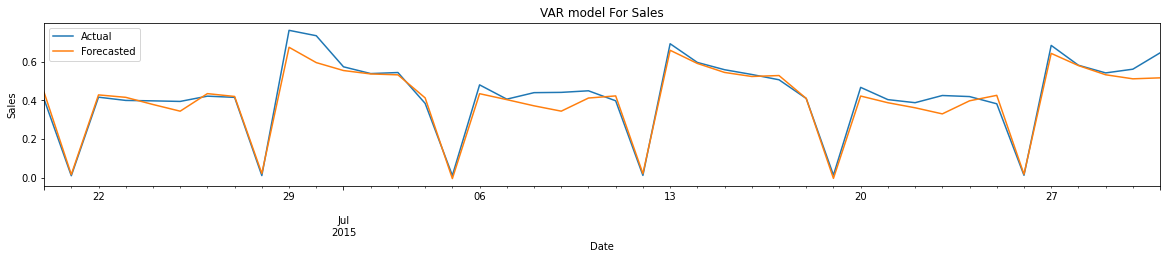

In [218]:
forecasted_timeseries_visualization(X_test['Sales'],X_test['ForecastedSales_VAR'],'Sales','VAR')


### Calculating RMSE and MAPE for Sales and Customer using VAR Model

In [219]:
from sklearn.metrics import mean_squared_error
summary_df=pd.DataFrame(columns=['Store','Model','RMSE_SALES','MAPE_SALES','RMSE_CUSTOMERS','MAPE_CUSTOMERS'])

def summary(s,fs,c,fc,store,model):
    rmse_sales = np.sqrt(mean_squared_error(s, fs)).round(2)
    mape_sales = np.round(np.mean(np.abs(s-fs)/s)*100,2)
    rmse_customers = np.sqrt(mean_squared_error(c, fc)).round(2)
    mape_customers = np.round(np.mean(np.abs(c-fc)/c)*100,2)
    temp=pd.DataFrame({'Store':[store],'Model':[model], 'RMSE_SALES': [rmse_sales],'MAPE_SALES': [mape_sales] , 
                            'RMSE_CUSTOMERS': [rmse_customers],'MAPE_CUSTOMERS': [mape_customers]})
    return temp

In [221]:
d=summary(X_test['Sales'], X_test['ForecastedSales_VAR'],
       X_test['Customers'], X_test['ForecastedCustomers_VAR'],'All','VAR')
summary_df = pd.concat([summary_df, d])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.05,19.37,0.03,9.1


## Inferences: 
#### VAR model MAPE_Sales = 19.37 and RMSE_Sales = 0.05  
#### VAR model MAPE_customer = 9.1 and RMSE_Customer = 0.03

## VARMAX Model

### Setting p=7 and =0

In [222]:
exog = X_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = X_train[['Sales', 'Customers']].astype(float)
model_VARMAX = sm.tsa.VARMAX(endog, order=(7,0),  exog=exog)
model_VARMAX_fit = model_VARMAX.fit(maxiter=1000, disp=False)
print(model_VARMAX_fit.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                            VARX(7)   Log Likelihood                3029.787
                              + intercept   AIC                          -5961.574
Date:                    Wed, 06 Apr 2022   BIC                          -5726.257
Time:                            21:25:21   HQIC                         -5871.681
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            1.40, 39.89   Jarque-Bera (JB):     5600.86, 1840.25
Prob(Q):                        0.24, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.61, 1.52   Skew:                     -1.77, -1.51
P

### forecasting on test data

In [223]:
exog_test = X_test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog_test= X_test[['Sales','Customers']]
varmax_fc = model_VARMAX_fit.predict(start=X_test.index.min(),end=X_test.index.max(),exog=exog_test)
varmax_forecast = pd.DataFrame(varmax_fc, index=X_test.index, columns=['Sales','Customers'])
varmax_forecast.head()

,Sales,Customers
Date,,
2015-06-20,0.441778,0.501143
2015-06-21,0.010161,0.009789
2015-06-22,0.461368,0.528415
2015-06-23,0.401980,0.495364
2015-06-24,0.361649,0.458001


In [224]:
### Creating a separate column in Test Dataset

X_test['ForecastedSales_Varmax']=varmax_forecast.Sales
X_test['ForecastedCustomers_Varmax']=varmax_forecast.Customers

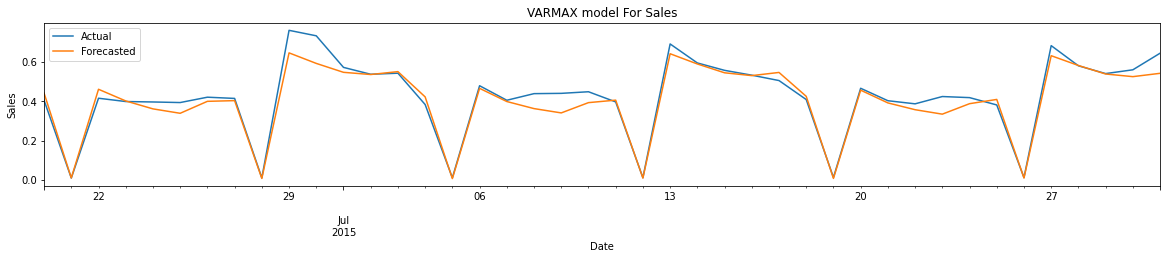

In [225]:
forecasted_timeseries_visualization(X_test['Sales'],X_test['ForecastedSales_Varmax'],'Sales','VARMAX')


### Calculating RMSE and MAPE for Sales and Customer using VARMAX Model

In [226]:
# Results for Both VAR and VARMAX
d=summary(X_test['Sales'], X_test['ForecastedSales_Varmax'],
       X_test['Customers'], X_test['ForecastedCustomers_Varmax'],'All','VARMAX')
summary_df = pd.concat([summary_df, d])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.05,19.37,0.03,9.10
0,All,VARMAX,0.05,9.66,0.03,8.46


## Inferences:  

### VARMAX model MAPE_Sales = 9.66 and RMSE_Sales = 0.05
### VARMAX model MAPE_customer = 8.46 and RMSE_Customer = 0.03